# The Titanic Problem Notebook
## 1. Import Module & Benennung des Datensets 

In [9]:
import pandas as pd


titanic_data = pd.read_csv(r'..\titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Datenerfassung
### 2.1 Beobachtungen & Fragen
Der Datensatz umfasst *12 Spalten* und 891 Zeilen mit Informationen zu Passagieren der Titanic. Anbei eine Übersicht der Spalten und der hinterlegten Informationen:
**1. 'PassengerId'**
Enthält die PassagierId. Die hinterlegten Zahlen stehen für die IDs und reichen von 1 - 891.

**2. 'Survived'**
Enthält den Überlebensstatus. 0 = hat nicht überlebt. 1 = hat überlebt.
 
**3. 'Pclass'**
Enthält die Passagierklasse. Die Zahlen der unterschiedlichen Klassen reichen von 1 - 3.
Frage: Wo genau lagen die Kabinen der Klassen auf dem Schiff? Sind sie etwa Etagen zugeordnet? Wie ist der Zusammenhang zwischen Pclass und Parch?
  
**4. 'Name'**
Enthält die nachfolgenden Informationen in der Reihenfolge:

*a. {Nachname} = Nachnamen. Wird in neue Spalte **'Surname'** ausgegliedert. Die Nachnamen werden in eine eigene Spalte {Surname} extrahiert, um später einfacher an Anreden/ Titel zu gelangen. Die Nachname  liegen als einfache Strings vor, z.B. 'Braund', 'Cumings' ...*

*b.  ',' = konstanter Separator nach 'Surname'*

*c.  {Anrede/ Titel} = Titel oder Anreden. Wird in neue Spalte **'Address'** ausgegliedert.*

*d.  Enthält verschiedene Titel und Anreden. Titel [], Anreden []*

*e.  '.' = konstanter Separator nach 'Address'*

*f.  {Vornamen} = ein oder mehrere Vornamen. Wird in neue Spalte **'First Name'** ausgegliedert. Die einzelnen Vornamen sind durch ' ' getrennt. Wenn 'Address' nicht 'Miss' ist, werden zuerst die Vornamen des Ehemanns angegeben.*

*g.  {Mädchenname} = Mädchenname. Wird in neue Spalte **'Maiden Name'** ausgegliedert. Wenn Titel/Anrede 'Mrs' ist, wird am Ende der Mädchenname in Klammern angegeben, z.B. (Florence Briggs Thayer). Spitznamen sind teilweise in Anführungszeichen angegeben, z.B. "Frankie"*
                                                                        
**5. 'Sex'**
Enthält das Geschlecht des Passagiers. Entweder 'female' für weiblich oder 'male' für männlich.

**6. 'Age'**
Enthält das Alter des Passagiers als Float.

**7. 'SibSp'**
Enthält die Geschwisteranzahl des Passagiers als Ganzzahl.

**8. 'Parch'**
Enthält Informationen zum Zustand der Umgebung?!

**9. 'Ticket'**
Enthält Ticketnamen. Diese Bezeichnungen setzten sich entweder nur aus Zahlen, aus einer Buchstabenfolge und Zahlen oder einer Kombination aus Sonderzeichen, Buchstaben und Zahlen.

**10. 'Fare'**
Enthält den Ticketpreis als Float mit 4 Nachkommastellen.

**11. 'Cabin'**
Enthält den Namen der Kabine des Passagiers. Setzt sich zusammen aus Buchstaben und Zahlenfolge, bsp. 'C85', 'E46'.

**12 'Embarked'**
Enthält den Ort, an dem der Passagier zugestiegen ist. S = Southampton (England), C = Cherbourg (Frankreich), Q = Queenstown (Irland).

### 2.2 Dynamische Indexierung
Muss am Ende der Datenbereinigung einmalig ausgeführt werden.

In [10]:
titanic_index = pd.Index(titanic_data.columns)
# titanic_index.get_loc('Surname')

## 3. Datenbereinigung 


## 3.1 Special Case: Noël Leslie, Countess of Rothes 

In [11]:
test_df = titanic_data['Name'].str.split(r'\s', regex=True, expand=True, n=1)
test_df.columns = ['Address', 'First Name']
test_df['Address'].value_counts()
test_df.query("Address == 'the'")
#test_df.get('Address') == 'the'
titanic_data.iloc[759]


PassengerId                                                  760
Survived                                                       1
Pclass                                                         1
Name           Rothes, the Countess. of (Lucy Noel Martha Dye...
Sex                                                       female
Age                                                         33.0
SibSp                                                          0
Parch                                                          0
Ticket                                                    110152
Fare                                                        86.5
Cabin                                                        B77
Embarked                                                       S
Name: 759, dtype: object

In [12]:
rothes = titanic_data[titanic_data['Name'].str.contains('Rothes')]
titanic_data.loc[rothes.index,'Name'] = rothes['Name'].str.replace(r'of ', repl='', regex=True)

titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 3.2 Trennung der Namen zu 'Surname' und 'Name'

In [13]:
names_df = titanic_data['Name'].str.split(', ', n=1, expand=True)
titanic_data.insert(3, 'Surname', names_df[0])
titanic_data.insert(4, 'name', names_df[1])

In [14]:
#del titanic_data['Name']
#titanic_data.rename({'name': 'Name'}, axis=1, inplace=True)
titanic_data


,PassengerId,Survived,Pclass,Surname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila,Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham,Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Johnston,"Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr,Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


### 3.3 Trennung der Namen in 'Address' und 'First Name'

In [16]:
names_df = titanic_data['Name'].str.split('. ', n=1, expand=True)
titanic_data.insert(3,'Address', names_df[0])
titanic_data['Name'] = titanic_data['Name'].str.replace(r'^[^.]*\.', '', regex=True)
titanic_data

,PassengerId,Survived,Pclass,Address,Surname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,Braund,Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,Cumings,John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,Heikkinen,Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,Futrelle,Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,Allen,William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,Montvila,Juozas,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,Graham,Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,Johnston,"Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,Behr,Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


### 3.4 Trennung der Mädchennamen zu 'Name' und 'Maiden Name'

In [18]:
names_df = titanic_data['Name'].str.extract(r'\((.*?)\)', expand=False)
titanic_data.insert(loc=6, column='Maiden Name', value=names_df)
titanic_data['Maiden Name'].fillna('', inplace=True)
titanic_data['Name'] = titanic_data['Name'].str.replace(r'\(.*?\)', '',regex=True)
titanic_data['Maiden Name'].value_counts()

titanic_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_8532\2085248212.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Maiden Name'].fillna('', inplace=True)


,PassengerId,Survived,Pclass,Address,Surname,Name,Maiden Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,Braund,Owen Harris,,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,Cumings,John Bradley,Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,Heikkinen,Laina,,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,Futrelle,Jacques Heath,Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,Allen,William Henry,,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,Montvila,Juozas,,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,Graham,Margaret Edith,,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,Johnston,"Catherine Helen ""Carrie""",,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,Behr,Karl Howell,,male,26.0,0,0,111369,30.0000,C148,C


### 3.5 Summe der einzelnen Titel.

In [19]:
address_counts = titanic_data['Address'].value_counts()
print(address_counts)

Address
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
th            1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


## Überlebensrate insgesamt


In [20]:
survival_rate = titanic_data['Survived'].mean()

print("Overall survival rate: {:.2f}".format(survival_rate))
#print(f"Gesamte Überlebensrate: {survival_rate}")

Overall survival rate: 0.38


## Gruppierung und Analyse nach Pclass 

In [ ]:
#pclass_survival = titanic_data.groupby('Pclass')['Survived'].mean()
#print(f"Überlebensrate nach Passagierklasse:\n{pclass_survival}")

### Überlebensrate nach Klasse


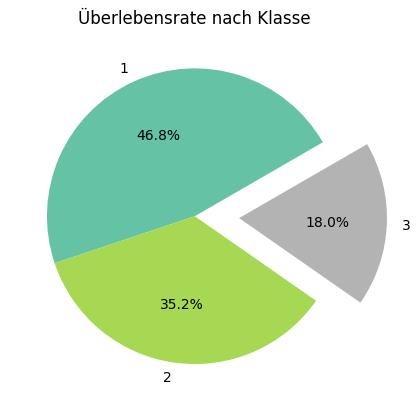

In [25]:
import matplotlib.pyplot as plt

survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()

survival_by_class.plot(kind='pie', 
                       title='Überlebensrate nach Klasse',
                       explode=(0,0,0.3),
                       autopct='%1.1f%%',
                       startangle=30,
                       cmap='Set2',
                       ylabel='');

#plt.xlabel('Klasse')
#plt.ylabel('Überlebensrate')
#plt.show()

# Gruppierung und Analyse nach Geschlecht

### Überlebensrate nach Geschlecht

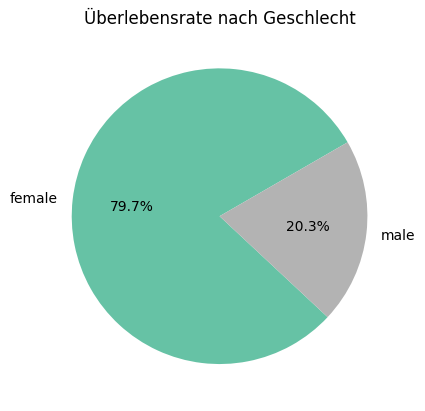

In [28]:
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean()
survival_by_gender.plot(kind='pie', 
                        title='Überlebensrate nach Geschlecht',
                        explode=(0,0),
                        autopct='%1.1f%%',
                        startangle=30,
                        cmap='Set2',
                        ylabel='');

#plt.xlabel('Geschlecht')
#plt.ylabel('Überlebensrate')
#plt.show() 

## Altersverteilung analysieren

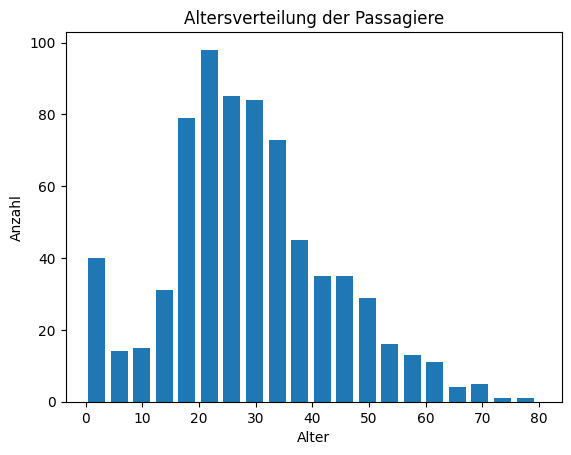

In [32]:
titanic_data['Age'].plot(kind='hist',
                         bins=20,
                         title='Altersverteilung der Passagiere',
                         xlabel='Alter',
                         width=3,
                         ylabel='Anzahl');

#plt.xlabel('Alter')
#plt.ylabel('Häufigkeit')
#plt.show()

## Überlebensrate von verheirateten und unverheirateten Frauen

<Axes: title={'center': 'Überlebensrate nach Verheiratete'}>

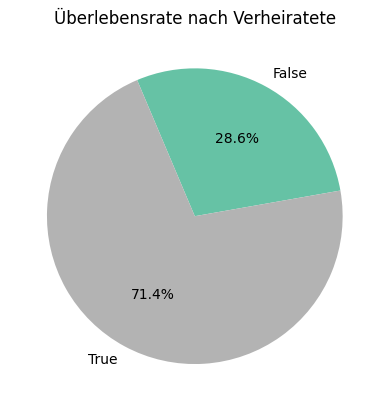

In [38]:
titanic_data['Married'] = titanic_data['Address'].str.contains('Mrs', case=False)
survival_by_married = titanic_data.groupby('Married')['Survived'].mean()

survival_by_married.plot(kind='pie', 
                         title='Überlebensrate nach Verheiratete',
                         explode=(0,0),
                         autopct='%1.1f%%',
                         startangle=10,
                         cmap='Set2',
                         ylabel='')
                         
#plt.xlabel('Verheiratet')
#plt.ylabel('Überlebensrate')
#plt.xticks([0, 1], ['Unverheiratet', 'Verheiratet'])
#plt.show()

## Überlebensrate von Passagieren mit Geschwistern/Ehepartnern an Bord


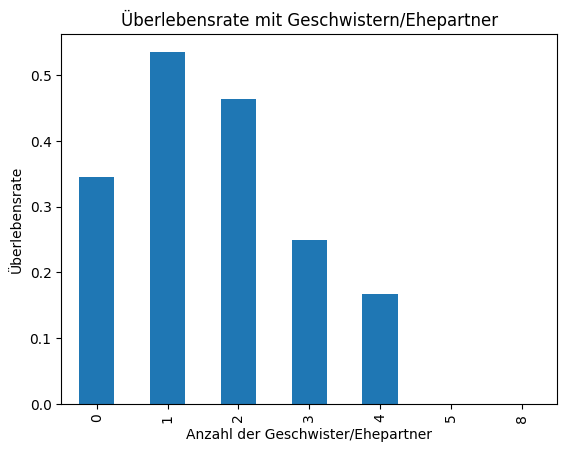

In [41]:
ueberlebensrate_mit_geschwistern_ehepartner = titanic_data.groupby('SibSp')['Survived'].mean()
ueberlebensrate_mit_geschwistern_ehepartner.plot(kind='bar', 
                                                title='Überlebensrate mit Geschwistern/Ehepartner')

plt.xlabel('Anzahl der Geschwister/Ehepartner')
plt.ylabel('Überlebensrate')
plt.show()

## Unterschiede in der Sterblichkeit von Kindern je nach Alter

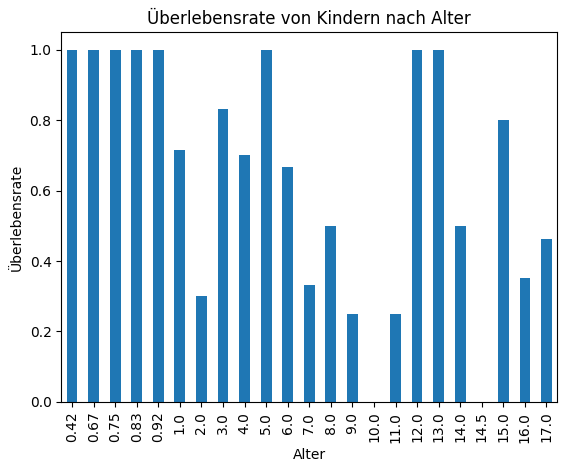

In [43]:
children = titanic_data[titanic_data['Age'] < 18]
children_survival_by_age = children.groupby('Age')['Survived'].mean()
children_survival_by_age.plot(kind='bar', 
                              title='Überlebensrate von Kindern nach Alter')

plt.xlabel('Alter')
plt.ylabel('Überlebensrate')
plt.show()

## Analyse der Rollen von Geschwistern, Ehepartnern, Eltern und Kindern

In [44]:
siblings_count = titanic_data['SibSp'].sum()
parents_children_count = titanic_data['Parch'].sum()

print(f"Gesamtanzahl an Geschwistern/Ehepartnern an Bord: {siblings_count}")
print(f"Gesamtanzahl an Eltern/Kindern an Bord: {parents_children_count}")

Gesamtanzahl an Geschwistern/Ehepartnern an Bord: 466
Gesamtanzahl an Eltern/Kindern an Bord: 340


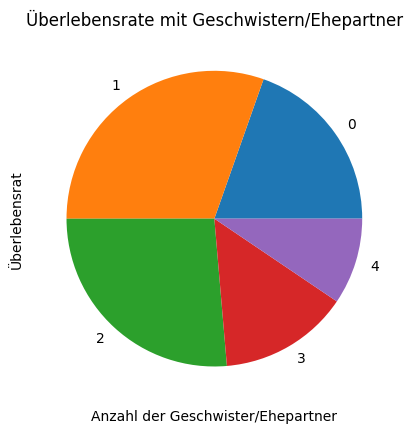

In [45]:
survival_with_siblings_spouse = titanic_data.groupby('SibSp')['Survived'].mean()
survival_with_siblings_spouse.plot(kind='pie', 
                                   title='Überlebensrate mit Geschwistern/Ehepartner')

plt.xlabel('Anzahl der Geschwister/Ehepartner')
plt.ylabel('Überlebensrat')
plt.show()

## Analyse der Kabinennummern

In [46]:
cabin_data = titanic_data['Cabin']
cabin_data

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [49]:
cabin_survival = titanic_data.groupby('Cabin')['Survived'].mean().dropna()
cabin_survival.plot(kind='scatter',
                    x=cabin_survival.index,
                    y=cabin_survival['Survived'],
                    title='Überlebensrate nach Kabine')
plt.xlabel('Kabine')
plt.ylabel('Überlebensrate')
plt.show()

KeyError: 'Cabin'